# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [35]:
airbnb = pd.read_csv("data 2/airbnb_NYC.csv", encoding="latin1")

# check if commas exist (thousands separators)
airbnb["Price"].astype(str).str.contains(",", regex=False).sum()


np.int64(181)

In [36]:
# clean + convert
airbnb["Price_clean"] = (
    airbnb["Price"].astype(str)
    .str.replace(",", "", regex=False)
)

airbnb["Price_clean"] = pd.to_numeric(airbnb["Price_clean"], errors="coerce")

# number of missing values after cleaning
airbnb["Price_clean"].isna().sum()

np.int64(0)

**Q1.1 Answer**
The `Price` variable was first loaded as an object (string) rather than a numeric type. When I inespected raw values, I found that some prices use commas as separators for thousands. This could cause problems when trying to convert directly to a number. To clean it, I just removed commas and used `pd.to_numeric(..errors="coerce")` to force convert the result to a numeric variable. After cleaning, the number of missing values in the cleaned version of price, `Price_clean` is 0. This means that every entry in the dataset was converted successfully once the comma formatting was removed

In [37]:
# 1.2 CODE
mn = pd.read_csv("data 2/mn_police_use_of_force.csv")
print(mn["subject_injury"].value_counts(dropna=False)) # check for missing values

mn["subject_injury_clean"] = mn["subject_injury"].map({ # map values to "Yes" and "No"
    "Yes": "Yes",
    "No": "No"
})

print(mn["subject_injury_clean"].isna().mean()) # proportion of missing values in the cleaned column

print(pd.crosstab( # cross-tabulation of force type and subject injury
    mn["force_type"],
    mn["subject_injury_clean"],
    margins=True
))

mn["subject_injury_clean"] = mn["subject_injury_clean"].fillna("Missing")


subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
0.7619342359767892
subject_injury_clean      No   Yes   All
force_type                              
Baton                      0     2     2
Bodily Force            1093  1286  2379
Chemical Irritant        131    41   172
Firearm                    2     0     2
Gun Point Display         33    44    77
Improvised Weapon         34    40    74
Less Lethal Projectile     1     2     3
Police K9 Bite             2    44    46
Taser                    150   172   322
All                     1446  1631  3077


**Q1.2 Answer** The `subject_injury` variable shows whether a subject was injured during a police use-of-force incident. I just cleaned this variable by mapping valid responses to "Yes" (injury occurred) and "No" (no injury occurred), while leaving the missing values as NaN initially. After cleaning, I found that around 76% of the oservations were missing values for `subject-iunjury`. I wnated to understand the context of the missingness better, so i cross-tabbed the `subject_injury` variable with `force_type`. This showed that missing injury info is concentrated in **Bodily Force** and **Taser** incidents mainly. This suggests missing data might not be just completely random and could be related to how injury reporting is handled across different types of force. finally, for the remaining missing values, I just replaced NaN with the explicit category `Missing`. 

In [38]:
#  1.3 CODE
metabric = pd.read_csv("data 2/metabric.csv")

print(metabric["Overall Survival Status"].value_counts())

# create binary survival variable
metabric["survival_binary"] = np.where(
    metabric["Overall Survival Status"] == "1:DECEASED",
    1,
    0
)

# verify result
print(metabric["survival_binary"].value_counts())

Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64
survival_binary
1    768
0    575
Name: count, dtype: int64


**1.3 Answer** I converted the variables so 1 represents deceased, 0 represents living.

In [39]:
# 1.4 CODE
airbnb = pd.read_csv("data 2/airbnb_NYC.csv", encoding="latin1")

# number of missing review scores
print("Missing Review Scores Rating:")
print(airbnb["Review Scores Rating"].isna().sum())

# median of non-missing values
median_rating = airbnb["Review Scores Rating"].median()
print("\nMedian Review Score Rating:")
print(median_rating)

# create imputed variable
airbnb["Review_Scores_Rating_imputed"] = (
    airbnb["Review Scores Rating"]
    .fillna(median_rating)
)

# check for no more missing values
print("\nMissing values after imputation:")
print(airbnb["Review_Scores_Rating_imputed"].isna().sum())

Missing Review Scores Rating:
8323

Median Review Score Rating:
94.0

Missing values after imputation:
0


**1.4 Answer:**
The variable `Review Scores Rating` contains 8,323 missing values. I created a new variable called `Review_Scores_Rating_imputed` where the missing values were filled using the median review score of 94 calculated from the non-missing observations.

It can bias the analysis because listings with missing review scores differ from those with observed ratings. Just replacing missing values with the median also reduces variability and may mask real differences in the data.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [40]:
# 2.1 CODE
import pandas as pd

sharks = pd.read_excel("data 2/GSAF5.xls")
sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Q2.1 Answer** I used pd.read_excel instead. This let me read the xls sheet. I did have to pip install xlrd though.

In [41]:
# 2.2 CODE
# check original shape
print("Original shape:", sharks.shape)

# drop columns with all missing values
sharks_clean = sharks.dropna(axis=1, how="all")

# check new shape
print("Shape after dropping empty columns:", sharks_clean.shape)

Original shape: (7074, 23)
Shape after dropping empty columns: (7074, 23)


**2.3 Answer:** An observation is a single unit of analysis represented in a dataset (usually by one row). It's one instance of whatever is being measured, like an event, object, individual etc. Columns reperesent variables describing that unit, either quantitatively or qualitatively. Cleaning decisions should preserve one row per observation, and aggregation or filtering should be done intentionally. It's important to do this carefully to avoid incorrect conclusions, such as double counting, or inappropriate summaries. 

In [42]:
# 2.4 CODE

# clean Year variable
sharks_clean["Year_clean"] = pd.to_numeric(
    sharks_clean["Year"], errors="coerce"
)

# show range of years
print("Year range:")
print(sharks_clean["Year_clean"].min(), "-", sharks_clean["Year_clean"].max())

# filter to attacks since 1940
sharks_1940 = sharks_clean[sharks_clean["Year_clean"] >= 1940]

print("\nFiltered year range:")
print(sharks_1940["Year_clean"].min(), "-", sharks_1940["Year_clean"].max())

# count attacks per year
attacks_per_year = sharks_1940["Year_clean"].value_counts().sort_index()

print("\nFirst few years of attack counts:")
print(attacks_per_year.head(10))

print("\nMost recent years of attack counts:")
print(attacks_per_year.tail(10))

Year range:
0.0 - 2026.0

Filtered year range:
1940.0 - 2026.0

First few years of attack counts:
Year_clean
1940.0    24
1941.0    27
1942.0    41
1943.0    28
1944.0    31
1945.0    16
1946.0    26
1947.0    30
1948.0    29
1949.0    31
Name: count, dtype: int64

Most recent years of attack counts:
Year_clean
2017.0    141
2018.0    124
2019.0    114
2020.0    101
2021.0    111
2022.0     98
2023.0    109
2024.0     52
2025.0     66
2026.0     12
Name: count, dtype: int64


**2.4 Answer:** The year range is from year 0.0 to the current year, 2026. Attacks appear to be generally increasing over time. This pattern is probably due to increased reporting and human interaction rather than an increase in shark aggression

Missing ages: 3149
Age range: 1.0 - 87.0


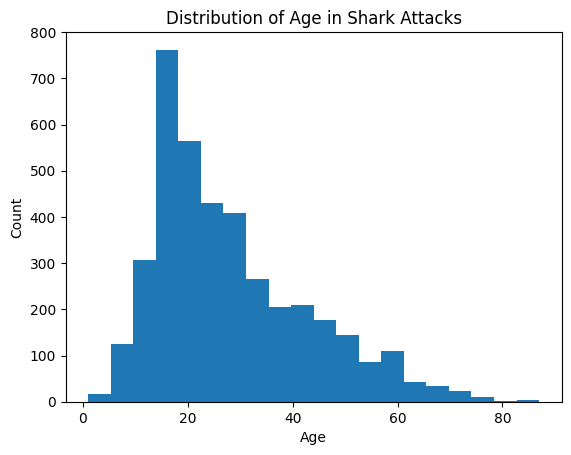

In [43]:
# 2.5 CODE
# clean age variable
sharks_clean["Age_clean"] = pd.to_numeric(
    sharks_clean["Age"], errors="coerce"
)

# basic check
print("Missing ages:", sharks_clean["Age_clean"].isna().sum())
print("Age range:", 
      sharks_clean["Age_clean"].min(), "-", sharks_clean["Age_clean"].max())

# histogram of age
sharks_clean["Age_clean"].dropna().plot(
    kind="hist",
    bins=20,
    title="Distribution of Age in Shark Attacks"
)

plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [44]:
# 2.6 CODE
# check original values
print(sharks_clean["Type"].value_counts(dropna=False))

# clean Type
sharks_clean["Type_clean"] = sharks_clean["Type"].where(
    sharks_clean["Type"].isin(["Provoked", "Unprovoked"]),
    "Unknown"
)

# check cleaned values
print("\nCleaned Type counts:")
print(sharks_clean["Type_clean"].value_counts())

# compute proportion of unprovoked attacks
prop_unprovoked = (
    sharks_clean["Type_clean"].value_counts(normalize=True)
    .get("Unprovoked", 0)
)

print("\nProportion of unprovoked attacks:")
print(prop_unprovoked)

Type
Unprovoked             5225
Provoked                642
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             26
NaN                      18
Boat                      7
 Provoked                 2
unprovoked                1
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

Cleaned Type counts:
Type_clean
Unprovoked    5225
Unknown       1207
Provoked       642
Name: count, dtype: int64

Proportion of unprovoked attacks:
0.738620299689002


**2.6 Answer:** Approximately 73.9% of shark attacks are unprovoked.

In [45]:
# 2.7 CODE
# inspect original Fatal Y/N values
print(sharks_clean["Fatal Y/N"].value_counts(dropna=False))

# clean Fatal Y/N variable
sharks_clean["Fatal_clean"] = sharks_clean["Fatal Y/N"].where(
    sharks_clean["Fatal Y/N"].isin(["Y", "N"]),
    "Unknown"
)

# check cleaned values
print("\nCleaned Fatal Y/N counts:")
print(sharks_clean["Fatal_clean"].value_counts())

Fatal Y/N
N          4933
Y          1488
NaN         561
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

Cleaned Fatal Y/N counts:
Fatal_clean
N          4933
Y          1488
Unknown     653
Name: count, dtype: int64


**2.8 Answer:** Shark attack appear to be more likely to be fatal when the attack is provoked compared to unprovoked attacks. Provoked attacks often involve closer or prolonged interaction with sharks, which might increase injury severity. Unprovoked attacks are usually brief or defensive, meaning fatal outcomes are less likely. 

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about? \
    **The paper discusses a standardized way to structure datasets to make them easier to clean, analye, model, and visualize.** 
  2. Read the introduction. What is the "tidy data standard" intended to accomplish? \
    **The tidy data standard hopes to provide a consistent structure for datasets to be cleaned so that data analysis tools work efficiently. Organizing data in a predictable way would let analysts spend less time cleaning data and more time analyzing it and interpreting results.**
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." \
  **It means that tidy data follows a common structure while messy dat appears disorganized in a lot of ways. Sentence 2 means that it might seem easy to identify variables and observation, but defining these concepts is difficult because context of the data and goals of analysis matter.**
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  **Values are individual data points in a dataset. Variables are collections of values that measure the same attribute across units. Observations are collection of values measured on the same unit across variables.**
  5. How is "Tidy Data" defined in section 2.3?
  **A dataset is considered tidy if each variable forms a column, each observation forms a row, and each type of observational unit forms its own table.**
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  **Variables stored in column headers, multiple variables stored in one column, variables stored in both rows and columns, multiple observational units in one table, and one observational unit spread across multiple tables. Table 4 is messy because income categories are stored as column headers instead of values. "Melting" means converting columns that represent values into rows sothat each variable has its own column.**
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  **Table 11 is messy because variables are spread across both rows and columns: days of the month stored as separate columns and measurement types stored in rows. Table 12 is tidy and molten because the data have been reshaped so each row represents a single observation and each variable has its own column.**

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

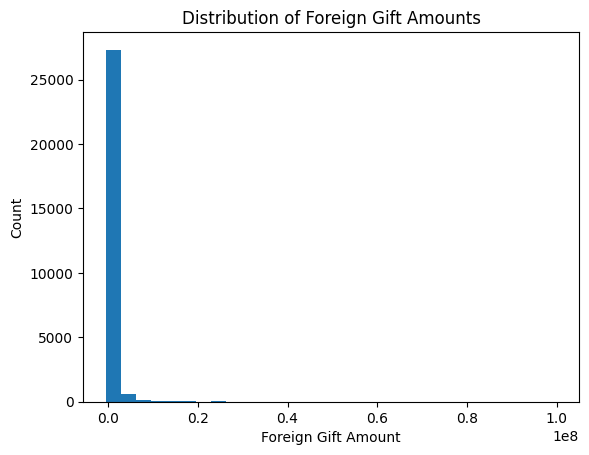

In [46]:
# 4.1 AND 4.2 CODE
gifts = pd.read_csv("data 2/ForeignGifts_edu.csv")

# histogram of Foreign Gift Amount
gifts["Foreign Gift Amount"].plot(
    kind="hist",
    bins=30,
    title="Distribution of Foreign Gift Amounts"
)

plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.show()

**4.2 Answer:** The distribution amount is highly right skewed. Most gifts are clustered close to zero, but a few are extremely large.

In [50]:
# 4.3 CODE

# proportions of each gift type
print("\nGift Type proportions:")
gift_type_props = gifts["Gift Type"].value_counts(normalize=True)
print(gift_type_props)

# proportions
contracts_prop = gift_type_props.get("Contract", 0)
real_estate_prop = gift_type_props.get("Real Estate", 0)
monetary_prop = gift_type_props.get("Monetary Gift", 0)

print("\nSelected proportions:")
print("Contracts:", contracts_prop)
print("Real Estate:", real_estate_prop)
print("Monetary Gifts:", monetary_prop)


Gift Type proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64

Selected proportions:
Contracts: 0.6120973742957372
Real Estate: 0.00038978065979235324
Monetary Gifts: 0.3875128450444704


**Answer 4.3:** Contracts are the most common type, making up about 61.2% of all gifts. Monetary gifts account for about 38.8%. Real estate gifts represent 0.03% of all gifts. 

In [ ]:
# 4.4 CODE
# top 15 by gifts
top_countries_count = (
    gifts.groupby("Country of Giftor")
    .size()
    .sort_values(ascending=False)
    .head(15)
)

print("Top 15 countries by number of gifts:")
print(top_countries_count)

# top 15 by amounts
top_countries_amount = (
    gifts.groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

print("\nTop 15 countries by total amount:")
print(top_countries_amount)

Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

Top 15 countries by total amount:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                2484

Top by total amount:\
QATAR                   2706240869 \
ENGLAND                 1464906771 \
CHINA                   1237952112\
SAUDI ARABIA            1065205930\
BERMUDA                  899593972\
CANADA                   898160656\
HONG KONG                887402529\
JAPAN                    655954776\
SWITZERLAND              619899445\
INDIA                    539556490\
GERMANY                  442475605\
UNITED ARAB EMIRATES     431396357\
FRANCE                   405839396\
SINGAPORE                401157692\
AUSTRALIA                248409202

Top by number of gifts:\
ENGLAND            3655\
CHINA              2461\
CANADA             2344\
JAPAN              1896\
SWITZERLAND        1676\
SAUDI ARABIA       1610\
FRANCE             1437\
GERMANY            1394\
HONG KONG          1080\
SOUTH KOREA         811\
QATAR               693\
THE NETHERLANDS     512\
KOREA               452\
INDIA               434\
TAIWAN              381

Top 15 institutions by total foreign gift amount:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype:

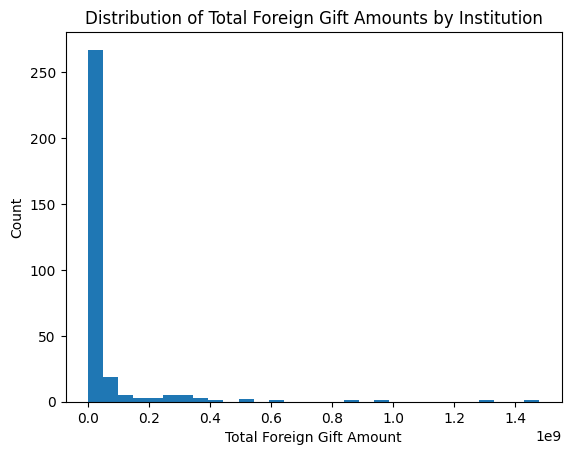

In [ ]:
# 4.5 CODE
# top 15 institutions by amount
top_institutions = (
    gifts.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

print(top_institutions)

# histogram
total_by_institution = (
    gifts.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
)

total_by_institution.plot(
    kind="hist",
    bins=30,
    title="Distribution of Total Foreign Gift Amounts by Institution"
)

plt.xlabel("Total Foreign Gift Amount")
plt.ylabel("Count")
plt.show()

**4.5 Answer:** \
Carnegie Mellon University                       1477922504\
Cornell University                               1289937761\
Harvard University                                954803610\
Massachusetts Institute of Technology             859071692\
Yale University                                   613441311\
Texas A&M University                              521455050\
Johns Hopkins University                          502409595\
Northwestern University                           402316221\
Georgetown University                             379950511\
University of Chicago (The)                       364544338\
University of Colorado Boulder                    360173159\
Duke University                                   343699498\
Brigham Young University                          323509863\
Stanford University                               319561362\
University of Texas MD Anderson Cancer Center     301527419

In [51]:
# 4.6 CODE
top_giftors = (
    gifts.groupby("Giftor Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**4.6 Answer:**\
Qatar Foundation                       1166503744\
Qatar Foundation/Qatar National Res     796197000\
Qatar Foundation for Education          373945215\
Anonymous                               338793629\
Saudi Arabian Cultural Mission          275221475\
HCL                                     190000000\
Church of Jesus Christ of LDS           185203715\
Emirates Institute for Advanced Sc      170641244\
QIC                                     148355497\
Anonymous #9                             96334996\
Qatar National Research Fund             79021705\
Government of Saudi Arabia               75192434\
Contracting Party                        69996984\
CMKL University                          67700000\
Royal Embassy of Saudi Arabia            67062486

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [53]:
# 5.1 CODE

college = pd.read_csv("data 2/college_completion.csv")

# 5.2 CODE
# number of observations and variables
print("Shape of dataset (rows, columns):")
print(college.shape)

# examine first few rows
print("\nFirst five rows of the dataset:")
college.head()

Shape of dataset (rows, columns):
(3798, 63)

First five rows of the dataset:


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


**5.2 Answer:** 3798 observations, and 63 variables. Each observation represents one college or university. The variables desecribe institution level, control type, average student aid, etc

In [54]:
# 5.3 CODE
control_level_ct = pd.crosstab(
    college["control"],
    college["level"]
)

print(control_level_ct)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


**5.3 Answer:** Public institutions are more commonly 2-year schools, while private not-for-profit institutinos are predominantly 4-year schools. Private-for-profit institutions are more evenly spliit between the 2, with a slight majority of them being 4-year.

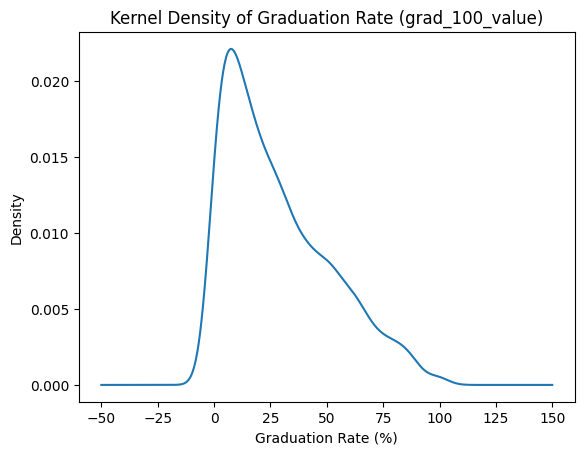

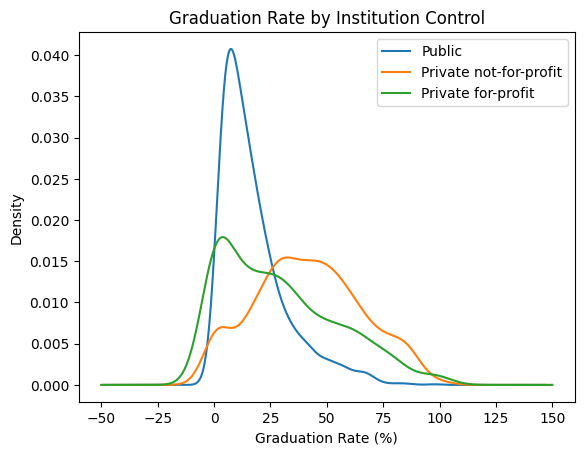

In [55]:
# 5.4 CODE
# KDE for graduation rate
college["grad_100_value"].dropna().plot(
    kind="kde",
    title="Kernel Density of Graduation Rate (grad_100_value)"
)

plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show()

# KDE conditioned on control
for c in college["control"].unique():
    college.loc[college["control"] == c, "grad_100_value"] \
        .dropna() \
        .plot(kind="kde", label=c)

plt.title("Graduation Rate by Institution Control")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.legend()
plt.show()

**5.4 Answer:** The overall kernel density plot shows a right-skewed distribution. Most institutions have relatively low graduation rates. When conditioning on institution contorl, private not-for-profit institutions tend to have higher graduation rates. Their density is shifted the furthest to the right. Public institutions are more concentrated at lower rates, and private for-profit institutions fall in between but still show lower graduation outcomes.

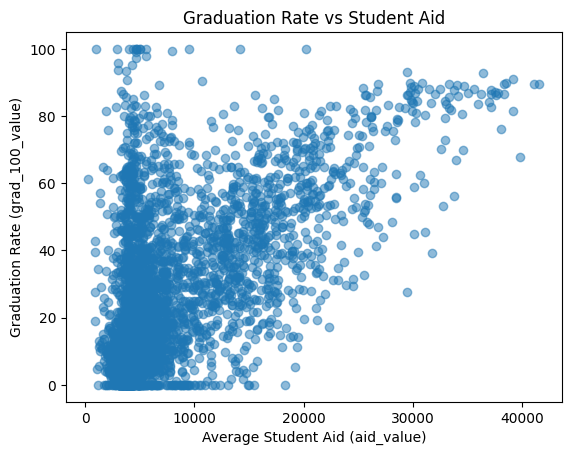

Overall covariance: 88610.48316902411
Overall correlation: 0.5758792845936064


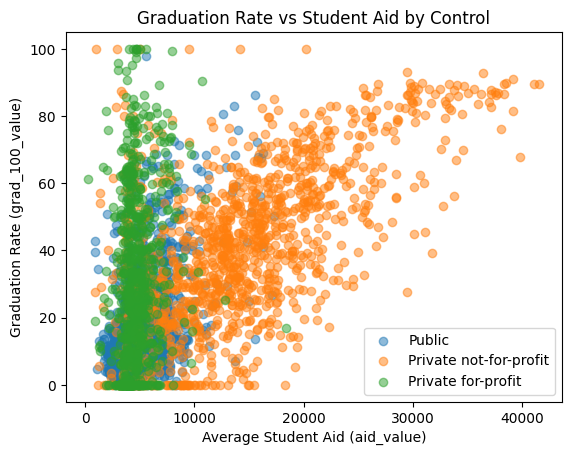

Public - covariance: 15355.146211760215
Public - correlation: 0.48248104589833757

Private not-for-profit - covariance: 109274.12333702881
Private not-for-profit - correlation: 0.6015909241488575

Private for-profit - covariance: 6897.524957237811
Private for-profit - correlation: 0.1883627008424557



In [56]:
# 5.5 CODE

# scatterplot of graduation rate vs aid value
plt.scatter(
    college["aid_value"],
    college["grad_100_value"],
    alpha=0.5
)

plt.xlabel("Average Student Aid (aid_value)")
plt.ylabel("Graduation Rate (grad_100_value)")
plt.title("Graduation Rate vs Student Aid")
plt.show()

# covariance and correlation (overall)
cov_overall = college[["aid_value", "grad_100_value"]].cov().iloc[0, 1]
corr_overall = college[["aid_value", "grad_100_value"]].corr().iloc[0, 1]

print("Overall covariance:", cov_overall)
print("Overall correlation:", corr_overall)

# scatterplots conditioned on control
for c in college["control"].unique():
    subset = college[college["control"] == c]
    
    plt.scatter(
        subset["aid_value"],
        subset["grad_100_value"],
        alpha=0.5,
        label=c
    )

plt.xlabel("Average Student Aid (aid_value)")
plt.ylabel("Graduation Rate (grad_100_value)")
plt.title("Graduation Rate vs Student Aid by Control")
plt.legend()
plt.show()

# covariance and correlation by control
for c in college["control"].unique():
    subset = college[college["control"] == c][["aid_value", "grad_100_value"]].dropna()
    
    cov = subset.cov().iloc[0, 1]
    corr = subset.corr().iloc[0, 1]
    
    print(f"{c} - covariance: {cov}")
    print(f"{c} - correlation: {corr}\n")

**5.5 Answer:** The scatterplot shows a moderate positive relationship between average student aid and graduation rates. Overall correlation is about 0.58, suggesting that higher aid schools tend to have higher graduation rates, although there's considerable variability. When conditioned on institution control, the positive relatinoship is very strong for private not-for-profit institutions at 0.60. Public schools show a weaker 0.48 correlation, while private for-profit schools have a very low 0.19 correlation.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

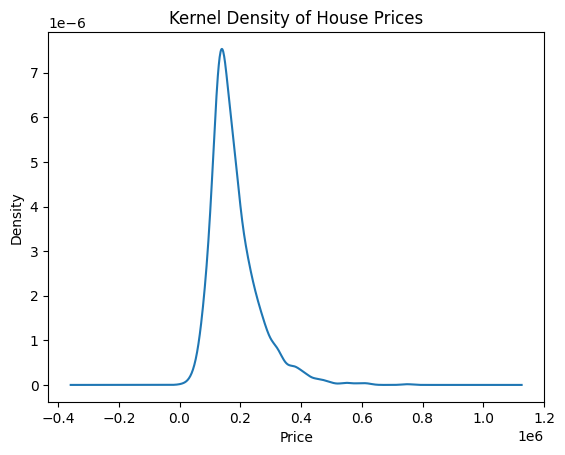

Overall price summary:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


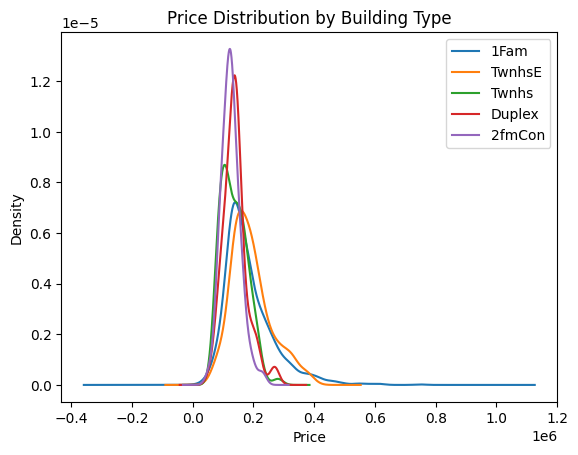


Price summary by building type:
            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


In [57]:
# 7.1 CODE
ames = pd.read_csv("data 2/ames_prices.csv")

# 7.2 CODE
# # overall KDE of price
ames["price"].dropna().plot(
    kind="kde",
    title="Kernel Density of House Prices"
)

plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

# overall describe table
print("Overall price summary:")
print(ames["price"].describe())

# KDE of price by building type
for b in ames["Bldg.Type"].unique():
    ames.loc[ames["Bldg.Type"] == b, "price"] \
        .dropna() \
        .plot(kind="kde", label=b)

plt.title("Price Distribution by Building Type")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

# describe table by building type
price_by_type = (
    ames.groupby("Bldg.Type")["price"]
    .describe()
)

print("\nPrice summary by building type:")
print(price_by_type)

**Answer 7.2:** End-of-unit townhomes (TwnhsE) have the highest average sale prices. Single-family homes (1Fam) also has relatively high prices on average. Single-family homes show tht ehighest variance prices, seen in teh KDE plot and their large StDev.

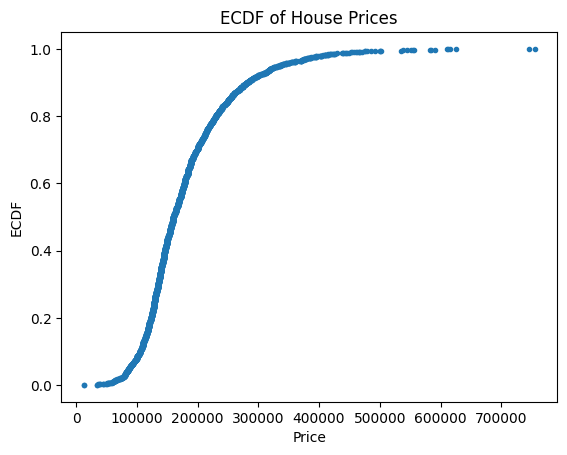

{'min': np.int64(12789), '25%': np.float64(129500.0), 'median': np.float64(160000.0), '75%': np.float64(213500.0), 'max': np.int64(755000)}


In [59]:
# 7.3 CODE

# drop missing prices
prices = ames["price"].dropna()

# ECDF
x = np.sort(prices)
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Price")
plt.ylabel("ECDF")
plt.title("ECDF of House Prices")
plt.show()

# five-number summary
five_num = {
    "min": prices.min(),
    "25%": prices.quantile(0.25),
    "median": prices.median(),
    "75%": prices.quantile(0.75),
    "max": prices.max()
}

print(five_num)

**Answer 7.3:** \
minimum: 12789\
25%: 129500\
median: 160000\
75%: 213500\
max: 755000

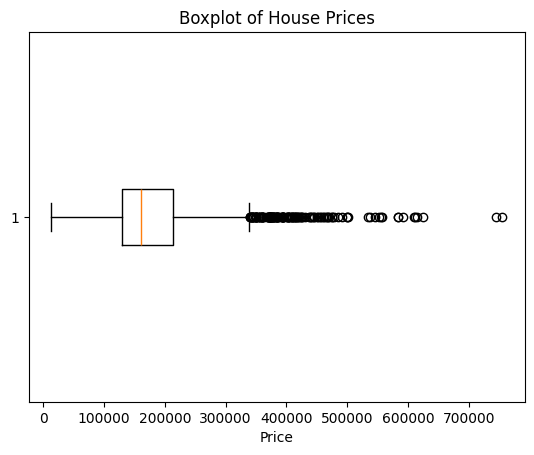

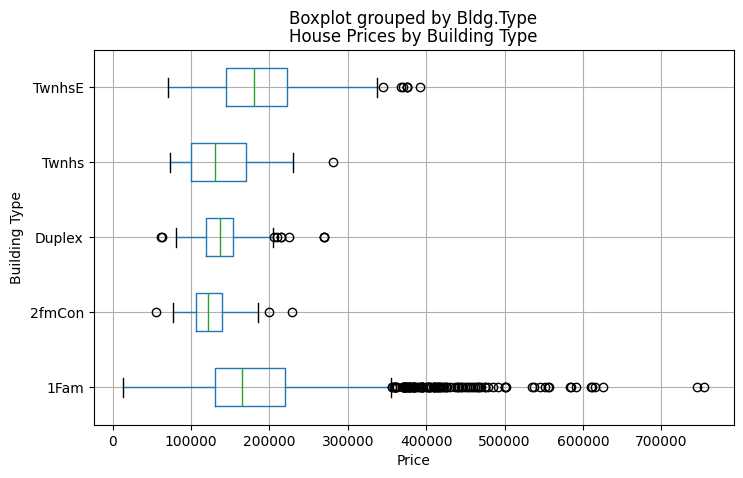

In [60]:
# 7.4 CODE
# boxplot of overall price
plt.boxplot(ames["price"].dropna(), vert=False)
plt.title("Boxplot of House Prices")
plt.xlabel("Price")
plt.show()

# boxplot of price by building type
ames.boxplot(
    column="price",
    by="Bldg.Type",
    vert=False,
    figsize=(8, 5)
)

plt.title("House Prices by Building Type")
plt.xlabel("Price")
plt.ylabel("Building Type")
plt.show()

**Answer 7.4:** The house prices boxplot shows many high-price outliers, which suggests a large right-skew in the distribution. When conditioning on building type, single-family homes have the widest spread. Townhomes and duplexes have narrower price ranges and less extreme values. There's a lot of variation in general between building types.

In [62]:
# 7.5 CODE
# compute IQR for price
Q1 = ames["price"].quantile(0.25)
Q3 = ames["price"].quantile(0.75)
IQR = Q3 - Q1

# define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# create outlier dummy variable
ames["price_outlier"] = (
    (ames["price"] < lower_bound) | (ames["price"] > upper_bound)
).astype(int)

# check counts
print("Outliers (1 outlier, 0 non-outlier):")
print(ames["price_outlier"].value_counts())

Outliers (1 outlier, 0 non-outlier):
price_outlier
0    2793
1     137
Name: count, dtype: int64


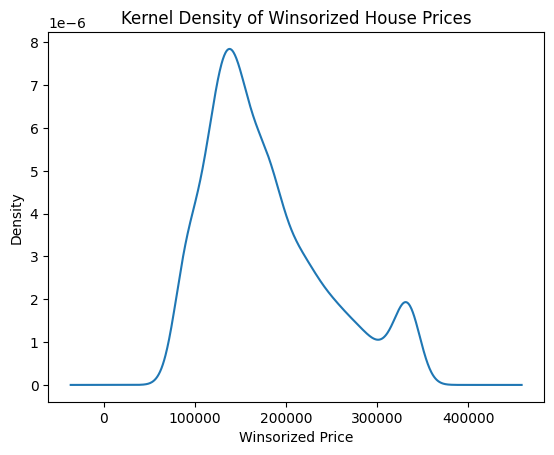

Winsorized price summary:
count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_winsor, dtype: float64


In [66]:
# 7.6 CODE
# compute winsorization bounds
lower_w = ames["price"].quantile(0.05)
upper_w = ames["price"].quantile(0.95)

# winsorize price
ames["price_winsor"] = ames["price"].clip(lower=lower_w, upper=upper_w)

# KDE of winsorized price
ames["price_winsor"].dropna().plot(
    kind="kde",
    title="Kernel Density of Winsorized House Prices"
)

plt.xlabel("Winsorized Price")
plt.ylabel("Density")
plt.show()

print("Winsorized price summary:")
print(ames["price_winsor"].describe())